Found 4674 images belonging to 4 classes.
Found 4674 images belonging to 4 classes.
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 132s 112ms/step - accuracy: 0.8358 - loss: 0.3967


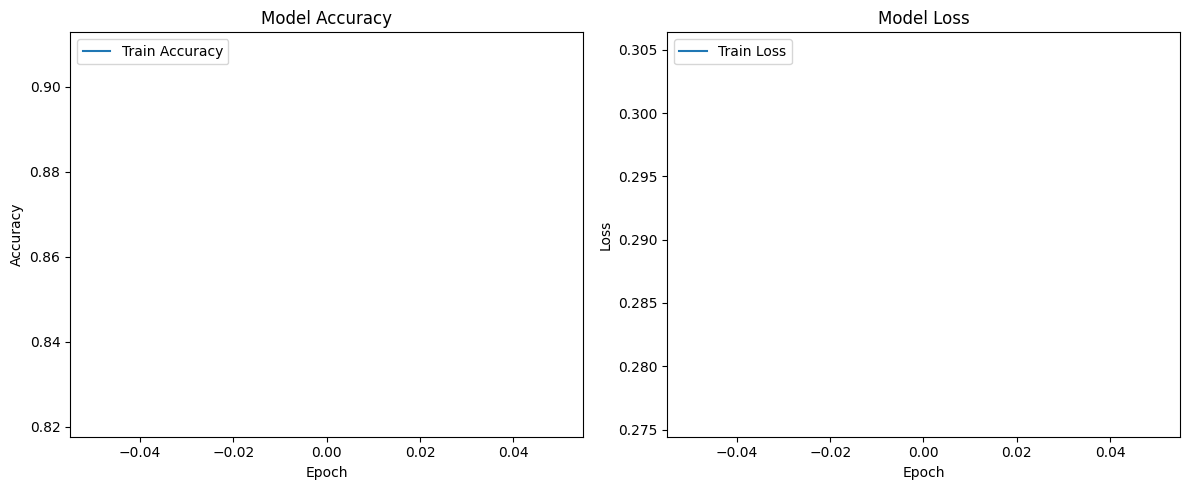

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
Predicted Class: Human with confidence: 50.93%


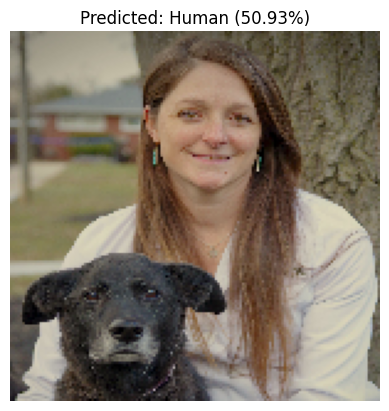

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

# Set your paths
data_dir = 'D:/Data/images'  # Update with the path to your dataset
image_size = (150, 150)  # Adjust based on your needs
batch_size = 4

# Create ImageDataGenerator for training and validation
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42  # Set seed for reproducibility
)

# Split data for training and validation
num_classes = len(train_generator.class_indices)
print(f"Found {len(train_generator.filenames)} images belonging to {num_classes} classes.")

# Build a simple CNN model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 1
history = model.fit(train_generator, epochs=epochs)

# Save the trained model (comment this if you don't want to save)
# model.save('my_model.keras')

# Function to plot training accuracy and loss
def plot_training_graph(history):
    plt.figure(figsize=(12, 5))

    # Plot training accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the training graph
plot_training_graph(history)

# Function to make predictions
def predict_image(model, img_path, threshold=0.5):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    confidence = np.max(predictions)  # Get the maximum confidence score

    # Get class names
    class_names = list(train_generator.class_indices.keys())
    predicted_label = class_names[predicted_class[0]]

    # Check if the confidence meets the threshold
    if confidence >= threshold:
        print(f"Predicted Class: {predicted_label} with confidence: {confidence * 100:.2f}%")
    else:
        print("The image does not belong to any recognized classes.")

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label} ({confidence * 100:.2f}%)" if confidence >= threshold else "Not Recognized")
    plt.axis('off')
    plt.show()

# Example usage
example_image_path = "C:/Users/LENOVO THINKPAD E14/Downloads/tes.jpg"  # Update with a valid image path
predict_image(model, example_image_path)


Found 4674 images belonging to 4 classes.
Found 4674 images belonging to 4 classes.
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 94s 79ms/step - accuracy: 0.8222 - loss: 0.4224


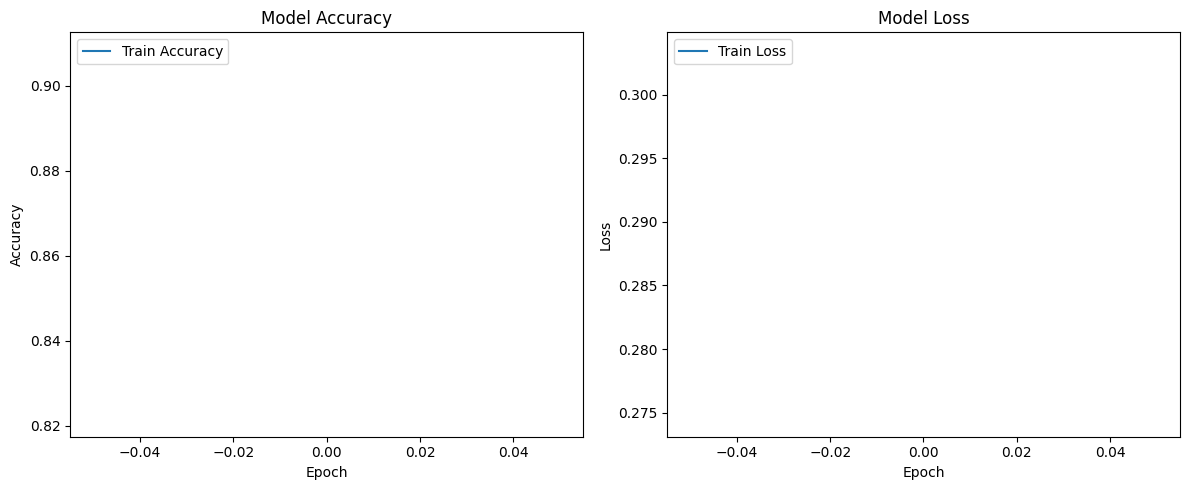

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


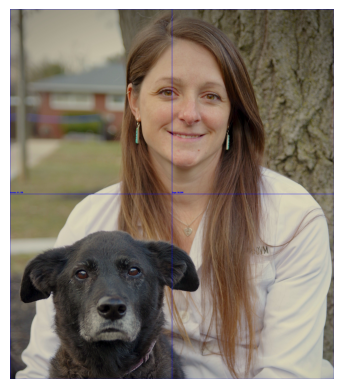

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import cv2  # OpenCV for image processing

# Set your paths
data_dir = 'D:/Data/images'  # Update with the path to your dataset
image_size = (150, 150)  # Adjust based on your needs
batch_size = 4

# Create ImageDataGenerator for training and validation
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42  # Set seed for reproducibility
)

# Split data for training and validation
num_classes = len(train_generator.class_indices)
print(f"Found {len(train_generator.filenames)} images belonging to {num_classes} classes.")

# Build a simple CNN model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 1
history = model.fit(train_generator, epochs=epochs)

# Save the trained model (comment this if you don't want to save)
# model.save('my_model.keras')

# Function to plot training accuracy and loss
def plot_training_graph(history):
    plt.figure(figsize=(12, 5))

    # Plot training accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the training graph
plot_training_graph(history)

# Function to make predictions and draw bounding boxes
def predict_and_draw_bounding_boxes(model, img_path, threshold=0.5):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    original_image = img.copy()
    height, width, _ = img.shape

    # Define the regions to predict (you may define this based on your requirements)
    regions = [
        (0, 0, width//2, height//2),  # Top-left
        (width//2, 0, width, height//2),  # Top-right
        (0, height//2, width//2, height),  # Bottom-left
        (width//2, height//2, width, height),  # Bottom-right
    ]

    # Class names
    class_names = list(train_generator.class_indices.keys())

    for (x1, y1, x2, y2) in regions:
        # Extract the region of interest
        roi = original_image[y1:y2, x1:x2]
        roi_resized = cv2.resize(roi, image_size) / 255.0
        roi_array = np.expand_dims(roi_resized, axis=0)

        # Predict the class for the region
        predictions = model.predict(roi_array)
        predicted_class = np.argmax(predictions, axis=1)
        confidence = np.max(predictions)  # Get the maximum confidence score

        # Check if the confidence meets the threshold
        if confidence >= threshold:
            predicted_label = class_names[predicted_class[0]]
            # Draw bounding box on the original image
            cv2.rectangle(original_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(original_image, f"{predicted_label}: {confidence * 100:.2f}%", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
example_image_path = "C:/Users/LENOVO THINKPAD E14/Downloads/tes.jpg"  # Update with a valid image path
predict_and_draw_bounding_boxes(model, example_image_path)


Found 4674 images belonging to 4 classes.
Found 4674 images belonging to 4 classes.
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 93s 78ms/step - accuracy: 0.8109 - loss: 0.4048


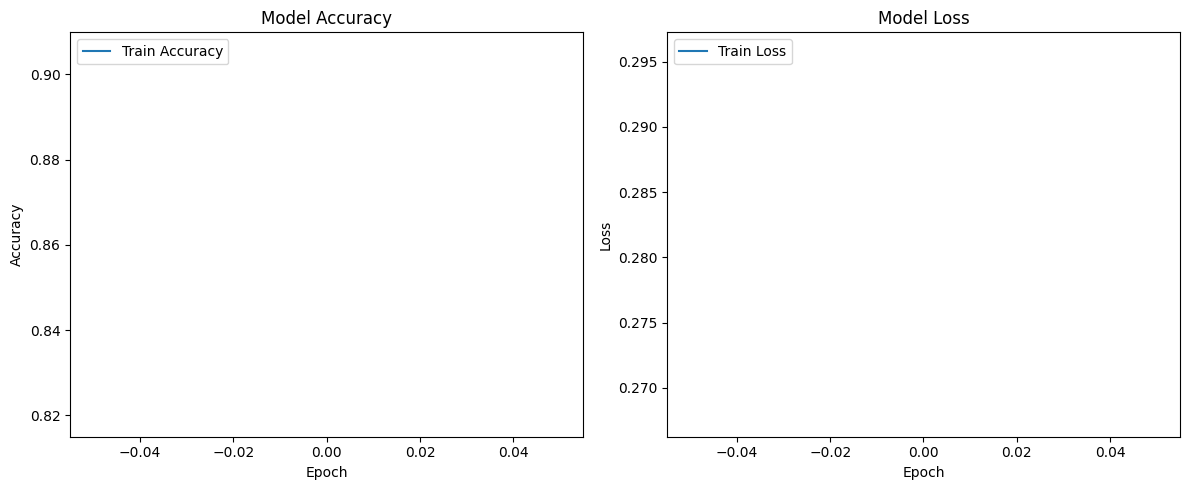

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


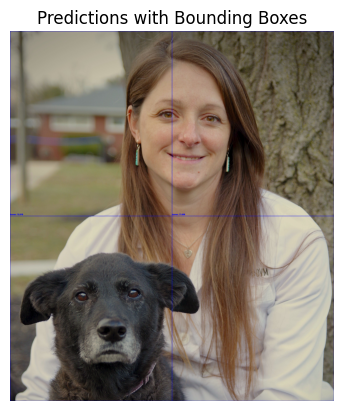

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import cv2  # OpenCV for image processing

# Set your paths
data_dir = 'D:/Data/images'  # Update with the path to your dataset
image_size = (150, 150)  # Adjust based on your needs
batch_size = 4

# Create ImageDataGenerator for training and validation
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42  # Set seed for reproducibility
)

# Split data for training and validation
num_classes = len(train_generator.class_indices)
print(f"Found {len(train_generator.filenames)} images belonging to {num_classes} classes.")

# Build a simple CNN model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 1
history = model.fit(train_generator, epochs=epochs)

# Save the trained model (comment this if you don't want to save)
# model.save('my_model.keras')

# Function to plot training accuracy and loss
def plot_training_graph(history):
    plt.figure(figsize=(12, 5))

    # Plot training accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the training graph
plot_training_graph(history)

# Function to make predictions and draw bounding boxes
def predict_and_draw_bounding_boxes(model, img_path, threshold=0.5):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    original_image = img.copy()
    height, width, _ = img.shape

    # Define the regions to predict (you may define this based on your requirements)
    regions = [
        (0, 0, width//2, height//2),  # Top-left
        (width//2, 0, width, height//2),  # Top-right
        (0, height//2, width//2, height),  # Bottom-left
        (width//2, height//2, width, height),  # Bottom-right
    ]

    # Class names
    class_names = list(train_generator.class_indices.keys())

    for (x1, y1, x2, y2) in regions:
        # Extract the region of interest
        roi = original_image[y1:y2, x1:x2]
        roi_resized = cv2.resize(roi, image_size) / 255.0
        roi_array = np.expand_dims(roi_resized, axis=0)

        # Predict the class for the region
        predictions = model.predict(roi_array)
        predicted_class = np.argmax(predictions, axis=1)
        confidence = np.max(predictions)  # Get the maximum confidence score

        # Check if the confidence meets the threshold
        if confidence >= threshold:
            predicted_label = class_names[predicted_class[0]]
            # Draw bounding box on the original image
            cv2.rectangle(original_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(original_image, f"{predicted_label}: {confidence * 100:.2f}%", 
                        (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Predictions with Bounding Boxes")
    plt.show()

# Example usage
example_image_path = "C:/Users/LENOVO THINKPAD E14/Downloads/tes.jpg"  # Update with a valid image path
predict_and_draw_bounding_boxes(model, example_image_path)


Found 4674 images belonging to 4 classes.
Found 4674 images belonging to 4 classes.
Epoch 1/2


D:\Anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\Anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1169/1169 ━━━━━━━━━━━━━━━━━━━━ 90s 75ms/step - accuracy: 0.8085 - loss: 0.3924
Epoch 2/2
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 87s 74ms/step - accuracy: 0.8923 - loss: 0.2366


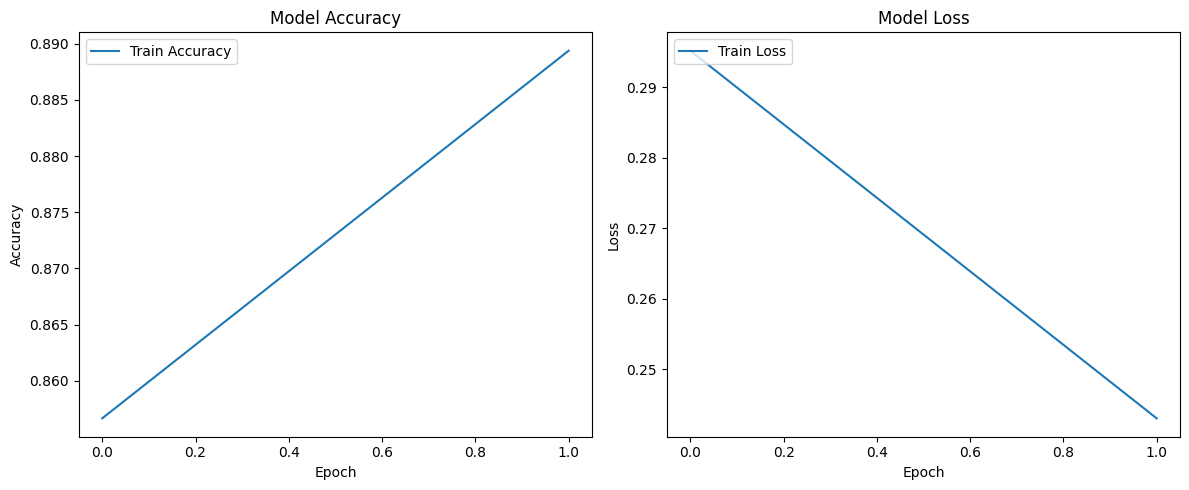

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Region [0, 0, 1549, 1767]: Dogs (24.88%)
Region [0, 0, 1549, 1767]: Human (74.86%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Region [1549, 0, 3098, 1767]: Dogs (42.45%)
Region [1549, 0, 3098, 1767]: Human (57.50%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Region [0, 1767, 1549, 3535]: Dogs (39.96%)
Region [0, 1767, 1549, 3535]: Human (60.01%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Region [1549, 1767, 3098, 3535]: Dogs (45.57%)
Region [1549, 1767, 3098, 3535]: Human (54.43%)


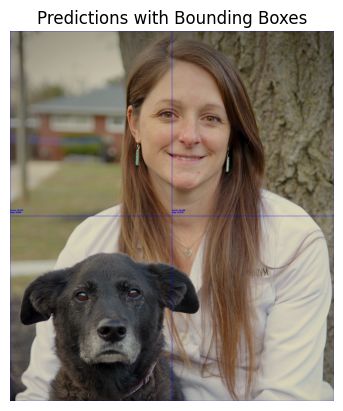

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import cv2  # OpenCV for image processing

# Set your paths
data_dir = 'D:/Data/images'  # Update with the path to your dataset
image_size = (150, 150)  # Adjust based on your needs
batch_size = 4

# Create ImageDataGenerator for training and validation
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42  # Set seed for reproducibility
)

# Split data for training and validation
num_classes = len(train_generator.class_indices)
print(f"Found {len(train_generator.filenames)} images belonging to {num_classes} classes.")

# Build a simple CNN model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 2
history = model.fit(train_generator, epochs=epochs)

# Save the trained model (comment this if you don't want to save)
# model.save('my_model.keras')

# Function to plot training accuracy and loss
def plot_training_graph(history):
    plt.figure(figsize=(12, 5))

    # Plot training accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the training graph
plot_training_graph(history)

# Function to make predictions and draw bounding boxes
def predict_and_draw_bounding_boxes(model, img_path, threshold=0.1):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    original_image = img.copy()
    height, width, _ = img.shape

    # Define the regions to predict (you may define this based on your requirements)
    regions = [
        (0, 0, width//2, height//2),  # Top-left
        (width//2, 0, width, height//2),  # Top-right
        (0, height//2, width//2, height),  # Bottom-left
        (width//2, height//2, width, height),  # Bottom-right
    ]

    # Class names
    class_names = list(train_generator.class_indices.keys())

    for (x1, y1, x2, y2) in regions:
        # Extract the region of interest
        roi = original_image[y1:y2, x1:x2]
        roi_resized = cv2.resize(roi, image_size) / 255.0
        roi_array = np.expand_dims(roi_resized, axis=0)

        # Predict the class for the region
        predictions = model.predict(roi_array)[0]

        # Only consider predictions that exceed the threshold
        for i, confidence in enumerate(predictions):
            if confidence >= threshold:
                predicted_label = class_names[i]
                # Draw bounding box on the original image
                cv2.rectangle(original_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                # Display all possible predictions with confidence scores
                cv2.putText(original_image, f"{predicted_label}: {confidence * 100:.2f}%", 
                            (x1, y1 - (i * 20 + 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

                # Print the possible classes and their percentages
                print(f"Region [{x1}, {y1}, {x2}, {y2}]: {predicted_label} ({confidence * 100:.2f}%)")

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Predictions with Bounding Boxes")
    plt.show()

# Example usage
example_image_path = "C:/Users/LENOVO THINKPAD E14/Downloads/tes.jpg"  # Update with a valid image path
predict_and_draw_bounding_boxes(model, example_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Region [0, 0, 341, 512]: Dogs (13.19%)
Region [0, 0, 341, 512]: Human (86.81%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Region [341, 0, 683, 512]: Dogs (12.76%)
Region [341, 0, 683, 512]: Human (87.24%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Region [0, 512, 341, 1024]: Dogs (10.24%)
Region [0, 512, 341, 1024]: Human (89.76%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Region [341, 512, 683, 1024]: Dogs (64.69%)
Region [341, 512, 683, 1024]: Human (35.31%)


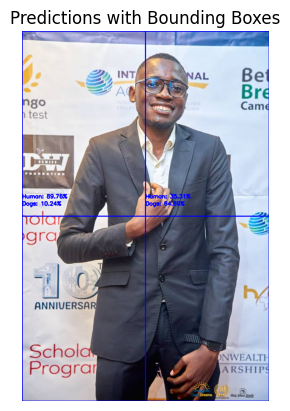

In [9]:
example_image_path = "C:/Users/LENOVO THINKPAD E14/OneDrive/Documents/Images/Professional photo.jpg"  # Update with a valid image path
predict_and_draw_bounding_boxes(model, example_image_path)

Found 4674 images belonging to 4 classes.
Found 4674 images belonging to 4 classes.
Epoch 1/2
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 88s 75ms/step - accuracy: 0.8234 - loss: 0.3854
Epoch 2/2
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 85s 73ms/step - accuracy: 0.8925 - loss: 0.2239


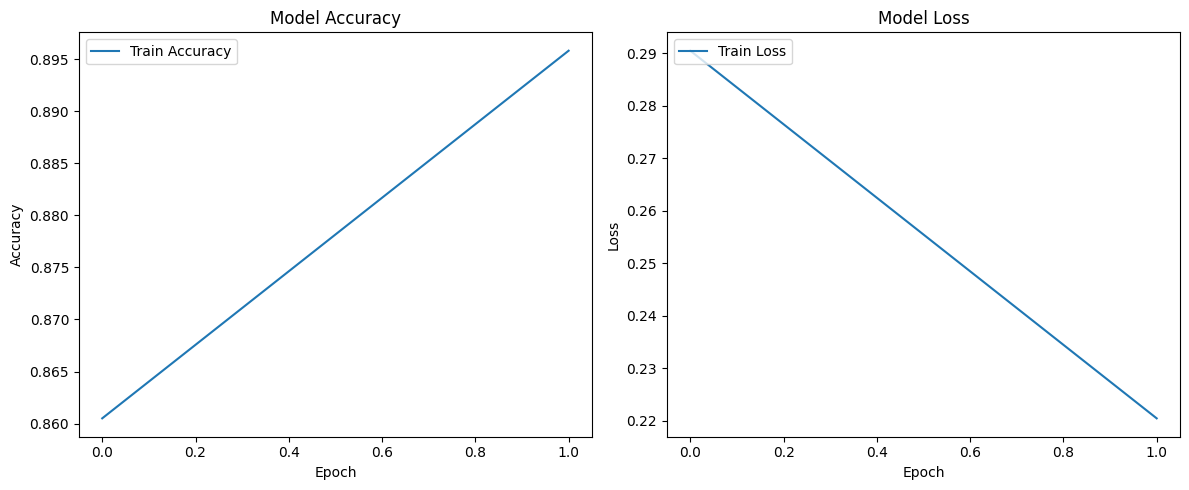

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Region [0, 0, 1549, 1767]: Human (76.09%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Region [1549, 0, 3098, 1767]: Dogs (37.13%)
Region [1549, 0, 3098, 1767]: Human (62.80%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Region [0, 1767, 1549, 3535]: Dogs (30.12%)
Region [0, 1767, 1549, 3535]: Human (69.86%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Region [1549, 1767, 3098, 3535]: Human (70.51%)


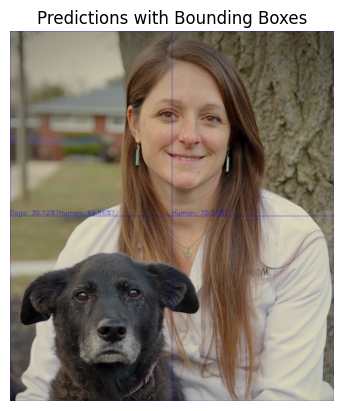

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import cv2  # OpenCV for image processing

# Set your paths
data_dir = 'D:/Data/images'  # Update with the path to your dataset
image_size = (150, 150)  # Adjust based on your needs
batch_size = 4

# Create ImageDataGenerator for training and validation
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42  # Set seed for reproducibility
)

# Split data for training and validation
num_classes = len(train_generator.class_indices)
print(f"Found {len(train_generator.filenames)} images belonging to {num_classes} classes.")

# Build a simple CNN model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 2
history = model.fit(train_generator, epochs=epochs)

# Save the trained model (comment this if you don't want to save)
# model.save('my_model.keras')

# Function to plot training accuracy and loss
def plot_training_graph(history):
    plt.figure(figsize=(12, 5))

    # Plot training accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the training graph
plot_training_graph(history)

# Function to make predictions and draw bounding boxes
def predict_and_draw_bounding_boxes(model, img_path, threshold=0.1, recognition_threshold=0.5, min_confidence=0.3):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    original_image = img.copy()
    height, width, _ = img.shape

    # Define the regions to predict (you may define this based on your requirements)
    regions = [
        (0, 0, width//2, height//2),  # Top-left
        (width//2, 0, width, height//2),  # Top-right
        (0, height//2, width//2, height),  # Bottom-left
        (width//2, height//2, width, height),  # Bottom-right
    ]

    # Class names
    class_names = list(train_generator.class_indices.keys())

    for (x1, y1, x2, y2) in regions:
        # Extract the region of interest
        roi = original_image[y1:y2, x1:x2]
        roi_resized = cv2.resize(roi, image_size) / 255.0
        roi_array = np.expand_dims(roi_resized, axis=0)

        # Predict the class for the region
        predictions = model.predict(roi_array)[0]
        max_confidence = np.max(predictions)
        predicted_class_index = np.argmax(predictions)

        # If the highest confidence is below the recognition threshold, label as "Not recognized"
        if max_confidence < recognition_threshold:
            label = "Not recognized"
            confidence_text = ""
            print(f"Region [{x1}, {y1}, {x2}, {y2}]: Not recognized")
        else:
            # If the class is recognized, show classes with confidence above the threshold and min_confidence
            label = ""
            confidence_text = ""
            for i, confidence in enumerate(predictions):
                if confidence >= threshold and confidence >= min_confidence:
                    predicted_label = class_names[i]
                    confidence_text += f"{predicted_label}: {confidence * 100:.2f}%\n"
                    print(f"Region [{x1}, {y1}, {x2}, {y2}]: {predicted_label} ({confidence * 100:.2f}%)")

        # Draw bounding box and label
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(original_image, f"{confidence_text if confidence_text else label}",
                    (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2)

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Predictions with Bounding Boxes")
    plt.show()

# Example usage
example_image_path = "C:/Users/LENOVO THINKPAD E14/Downloads/tes.jpg"  # Update with a valid image path
predict_and_draw_bounding_boxes(model, example_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Region [0, 0, 341, 512]: Human (92.56%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Region [341, 0, 683, 512]: Human (88.27%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Region [0, 512, 341, 1024]: Human (93.28%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Region [341, 512, 683, 1024]: Dogs (73.77%)


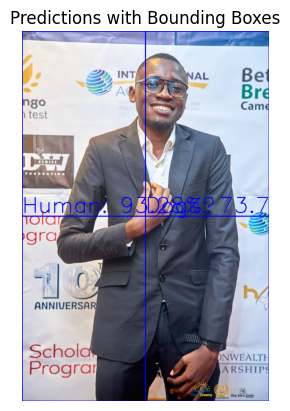

In [43]:
example_image_path = "C:/Users/LENOVO THINKPAD E14/OneDrive/Documents/Images/Professional photo.jpg"  # Update with a valid image path
predict_and_draw_bounding_boxes(model, example_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Region [0, 0, 540, 303]: Dogs (70.22%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Region [540, 0, 1080, 303]: Dogs (53.12%)
Region [540, 0, 1080, 303]: Human (46.88%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Region [0, 303, 540, 607]: Dogs (31.00%)
Region [0, 303, 540, 607]: Human (69.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Region [540, 303, 1080, 607]: Human (81.91%)


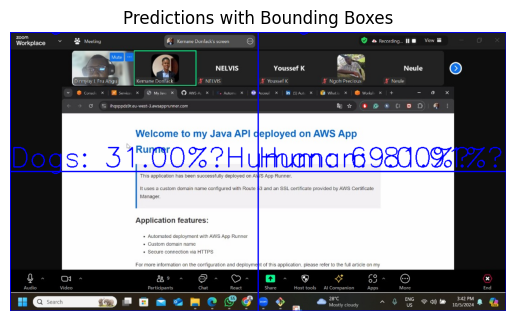

In [45]:

example_image_path = "C:/Users/LENOVO THINKPAD E14/Downloads/WhatsApp Image 2024-10-05 at 15.42.31_4e7272b2.jpg" # Update with a valid image path
predict_and_draw_bounding_boxes(model, example_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Region [0, 0, 185, 250]: Human (85.67%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Region [185, 0, 371, 250]: Human (79.79%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Region [0, 250, 185, 500]: Dogs (36.49%)
Region [0, 250, 185, 500]: Human (63.51%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Region [185, 250, 371, 500]: Human (76.33%)


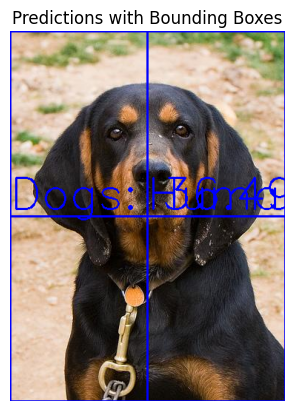

In [47]:
example_image_path = "C:/Users/LENOVO THINKPAD E14/Downloads/n02089078_243.jpg" # Update with a valid image path
predict_and_draw_bounding_boxes(model, example_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Region [0, 0, 90, 60]: Plants (69.16%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Region [90, 0, 180, 60]: Dogs (42.18%)
Region [90, 0, 180, 60]: Human (57.81%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Region [0, 60, 90, 120]: Human (88.69%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Region [90, 60, 180, 120]: Human (93.14%)


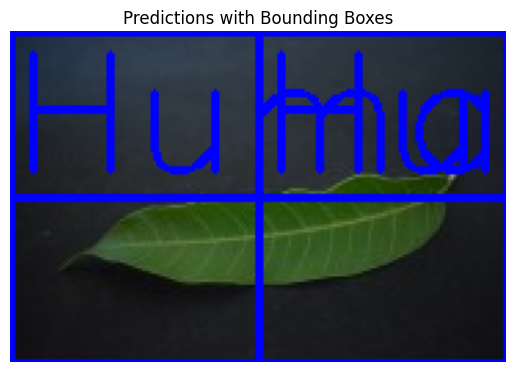

In [49]:
example_image_path = "C:/Users/LENOVO THINKPAD E14/Downloads/0001_0021.JPG" # Update with a valid image path
predict_and_draw_bounding_boxes(model, example_image_path)